# Visualizations and stats by group type
- 1: Government teachers' groups
- 2: Meghshala groups
- 3: 321 groups

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("../data/chkpt3/master.csv", index_col = 0)

In [8]:
df_gov = df[df.group_type == 1]
df_meg = df[df.group_type == 2]
df_tto = df[df.group_type == 3]

# Message character length distributions

In [9]:
def filter_messages(df):

    df = df[df.translated_message.isna() == False] #Filters NaN
    df = df[df.translated_message != "This message was deleted"] #Filters deleted messages
    df = df[df.translated_message != "You deleted this message"] #Filters deleted messages
    
    return df

### The most frequent messages

In [10]:
msg_gov = filter_messages(df_gov).translated_message
msg_meg = filter_messages(df_meg).translated_message
msg_tto = filter_messages(df_tto).translated_message

print("Most frequent messages for gov: \n", msg_gov.value_counts()[:15])
print("\n")
print("Most frequent messages for meg: \n", msg_meg.value_counts()[:15])
print("\n")
print("Most frequent messages for tto: \n", msg_tto.value_counts()[:15])
print("\n")

Most frequent messages for gov: 
 Lighten up              22
Thanks sir              17
Thanks tr               17
Thanks                  16
Congratulations sir     16
RIP                     15
✌️                      15
Congratulations sir     12
Dear,                   11
Congratulations         11
Thank you sir           10
Very nice                9
Khps benakanahalli       8
Good morning             8
Nice                     8
Name: translated_message, dtype: int64


Most frequent messages for meg: 
 Waiting for this message                                                                          58
                                                                                                  14
Thank you                                                                                         10
Yes                                                                                               10
Thanks mam                                                                        

### The distribution of messages by number of words

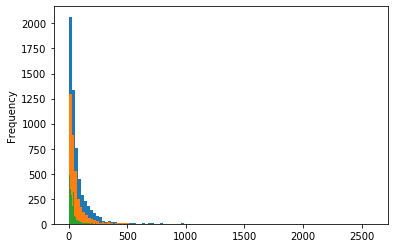

In [11]:
msg_gov.str.len().plot.hist(bins= 100)
msg_meg.str.len().plot.hist(bins= 100)
msg_tto.str.len().plot.hist(bins= 100)

In [12]:
print("The distribution for gov: \n", msg_gov.str.len().describe())
print("\n")
print("The distribution for meg: \n", msg_meg.str.len().describe())
print("\n")
print("The distribution for tto: \n", msg_tto.str.len().describe())
print("\n")

The distribution for gov: 
 count    5875.000000
mean       79.126979
std       131.928982
min         1.000000
25%        19.000000
50%        41.000000
75%        92.000000
max      2599.000000
Name: translated_message, dtype: float64


The distribution for meg: 
 count    3600.000000
mean       64.158056
std       105.819326
min         1.000000
25%        18.000000
50%        37.000000
75%        71.000000
max      2340.000000
Name: translated_message, dtype: float64


The distribution for tto: 
 count    3686.000000
mean       31.735214
std        38.738533
min         1.000000
25%         9.000000
50%        21.000000
75%        39.000000
max       466.000000
Name: translated_message, dtype: float64




### Transforming them by taking the logarithm

Text(0.5, 0, 'Log of character length')

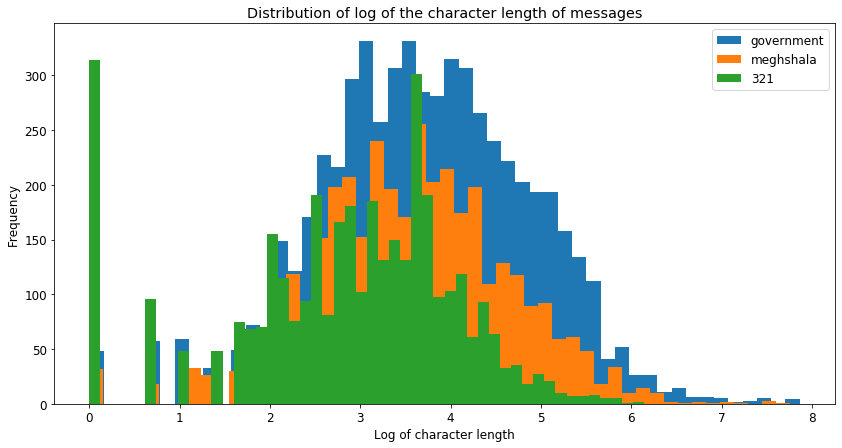

In [13]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["font.size"] = 12

np.log(msg_gov.str.len()).plot.hist(bins = 50)
np.log(msg_meg.str.len()).plot.hist(bins = 50)
np.log(msg_tto.str.len()).plot.hist(bins = 50)

plt.title("Distribution of log of the character length of messages")
plt.legend(["government","meghshala", '321'])

plt.xlabel("Log of character length")

In [14]:
import scipy.stats as stats
import researchpy as rp

In [15]:
df_f = filter_messages(df)

rp.summary_cont(df_f['translated_message'].str.len().groupby(df_f['group_type']))

,N,Mean,SD,SE,95% Conf.,Interval
group_type,,,,,,
1,5875,79.126979,131.928982,1.721220,75.753101,82.500856
2,3600,64.158056,105.819326,1.763655,60.700811,67.615300
3,3686,31.735214,38.738533,0.638066,30.484436,32.985993


In [16]:
stats.kruskal(np.log(msg_gov.str.len()), 
              np.log(msg_meg.str.len()),
              np.log(msg_tto.str.len()))

KruskalResult(statistic=1048.7752365211702, pvalue=1.8253704305058858e-228)

In [17]:
stats.f_oneway(np.log(msg_gov.str.len()), 
               np.log(msg_meg.str.len()),
               np.log(msg_tto.str.len()))

F_onewayResult(statistic=682.9092104790501, pvalue=6.615775582323556e-283)